In [1]:
#Import environment and libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Load CSV File as Pandas DataFrame & Preview DF
df = pd.read_csv(Path('./YOY_1819_combined_csv.csv'))
df.head()

,Primary_Key_2018_2019,School_Name,Grade_Test_Type,Mastery_Level,Baseline_Year,Compared_Year,YOY_State_2019,YOY_Region_2019,YOY_District_2019,YOY_African_American_2019,YoY_Hispanic_2019,YoY_White_2019,YoY_Econ_Disadv_2019,YoY_ELL_2019
0,_Grade 3 Mathematics_At Approaches Grade Level...,NaN,Grade 3 Mathematics,At Approaches Grade Level or Above,2018,2019,0.01,0.00,-0.030,0.080,-0.100,-0.02,-0.04,-0.11
1,_Grade 3 Mathematics_At Meets Grade Level or A...,NaN,Grade 3 Mathematics,At Meets Grade Level or Above,2018,2019,0.02,0.01,-0.030,0.001,-0.100,0.12,-0.02,-0.02
2,_Grade 3 Mathematics_At Masters Grade Level_2019,NaN,Grade 3 Mathematics,At Masters Grade Level,2018,2019,0.02,0.01,-0.050,-0.070,-0.030,-0.15,-0.06,-0.02
3,_Grade 3 Reading_At Meets Grade Level or Above...,NaN,Grade 3 Reading,At Meets Grade Level or Above,2018,2019,0.02,0.02,0.001,-0.060,0.001,-0.04,-0.01,-0.03
4,_Grade 3 Reading_At Masters Grade Level_2019,NaN,Grade 3 Reading,At Masters Grade Level,2018,2019,0.02,0.03,0.030,-0.040,0.070,0.02,0.04,0.05


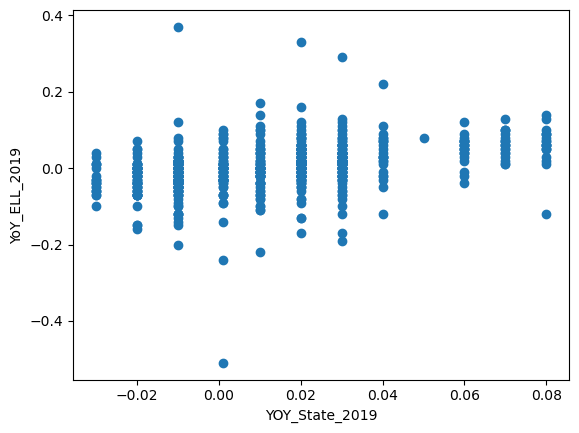

In [3]:
#Inspect relationship between state scores & ELL scores
plt.scatter(df.YOY_State_2019, df.YoY_ELL_2019)
plt.xlabel('YOY_State_2019')
plt.ylabel('YoY_ELL_2019')
plt.show()

In [4]:
#Format data to meet requirements of Scikit-learn library
X = df.YOY_State_2019.values.reshape(-1, 1)

In [5]:
#Examine first five entries in X
X[:5]

array([[0.01],
       [0.02],
       [0.02],
       [0.02],
       [0.02]])

In [6]:
#Examine shape of X; 1506 samples, with a single feature (column)
X.shape

(709, 1)

In [7]:
#Assign target variable, or ELL column, to y
y = df.YoY_ELL_2019

In [8]:
#Create instance of the linear regression model. Instantiation means that LinearRegression class is like a template that contains the algorithms required to perform linear regression. From this template, a specific object called model is created that will analyze the data and store info specific to dataset.
model = LinearRegression()

In [9]:
#Fit/Train Model, meaning analyze data and attempt to learn patterns
model.fit(X, y)

LinearRegression()

In [10]:
#Use predict methos to generate predictions, given the district that a student is in, model will predict ELL scores.
y_pred = model.predict(X)
print(y_pred.shape)

(709,)


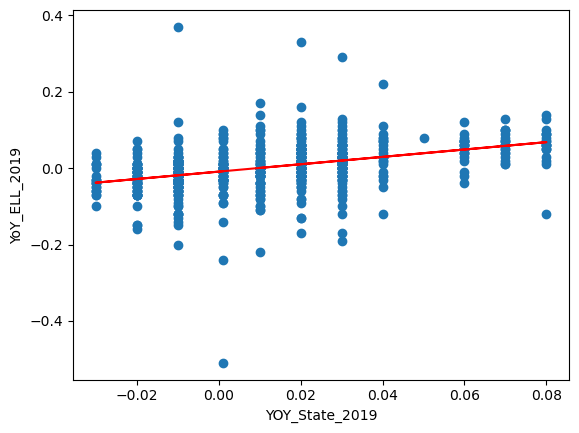

In [11]:
#Plot predictions with a red line against the data points
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('YOY_State_2019')
plt.ylabel('YoY_ELL_2019')
plt.show()

In [12]:
print(model.coef_)
print(model.intercept_)

[0.96562894]
-0.009010910639480332
